### Sarcasm Detection using LSTM 

In [1]:
import json 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
file_path = 'C:\\Users\\Mohd Kaif\\Downloads\\archive\\Sarcasm_Headlines_Dataset.json'
# Initialize an empty list to store JSON objects
data = []
# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Load each line as a JSON object
        json_object = json.loads(line)
        data.append(json_object)
# Convert the list of JSON objects to a DataFrame
df = pd.json_normalize(data)

In [3]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [4]:
df.describe

<bound method NDFrame.describe of                                             article_link  \
0      https://www.huffingtonpost.com/entry/versace-b...   
1      https://www.huffingtonpost.com/entry/roseanne-...   
2      https://local.theonion.com/mom-starting-to-fea...   
3      https://politics.theonion.com/boehner-just-wan...   
4      https://www.huffingtonpost.com/entry/jk-rowlin...   
...                                                  ...   
26704  https://www.huffingtonpost.com/entry/american-...   
26705  https://www.huffingtonpost.com/entry/americas-...   
26706  https://www.huffingtonpost.com/entry/reparatio...   
26707  https://www.huffingtonpost.com/entry/israeli-b...   
26708  https://www.huffingtonpost.com/entry/gourmet-g...   

                                                headline  is_sarcastic  
0      former versace store clerk sues over secret 'b...             0  
1      the 'roseanne' revival catches up to our thorn...             0  
2      mom starting to fea

In [5]:
# Check for Duplicate values:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26708 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26708 non-null  object
 1   headline      26708 non-null  object
 2   is_sarcastic  26708 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 834.6+ KB


In [9]:
import nltk
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Mohd
[nltk_data]     Kaif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mohd
[nltk_data]     Kaif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Extracting headline, label, and URL from each item in data
texts = [item["headline"] for item in data]
labels = [item["is_sarcastic"] for item in data]
urls = [item["article_link"] for item in data]

In [11]:
texts[0:10]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages"]

In [12]:
labels[0:10]

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

In [13]:
urls[0:5]

['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
 'https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb']

In [14]:
# Creating a DataFrame from extracted texts and labels, displaying the first 25 rows with a style
df = pd.DataFrame()
df["text"] = texts
df["label"] = labels
df.head(n=25).style.background_gradient(cmap="viridis")

,text,label
0,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,mom starting to fear son's web series closest thing she will have to grandchild,1
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,j.k. rowling wishes snape happy birthday in the most magical way,0
5,advancing the world's women,0
6,the fascinating case for eating lab-grown meat,0
7,"this ceo will send your kids to school, if you work for his company",0
8,top snake handler leaves sinking huckabee campaign,1
9,friday's morning email: inside trump's presser for the ages,0


In [15]:
df.groupby("label").count().style.background_gradient(cmap = "viridis")

,text
label,
0,14985
1,11724


<function matplotlib.pyplot.show(close=None, block=None)>

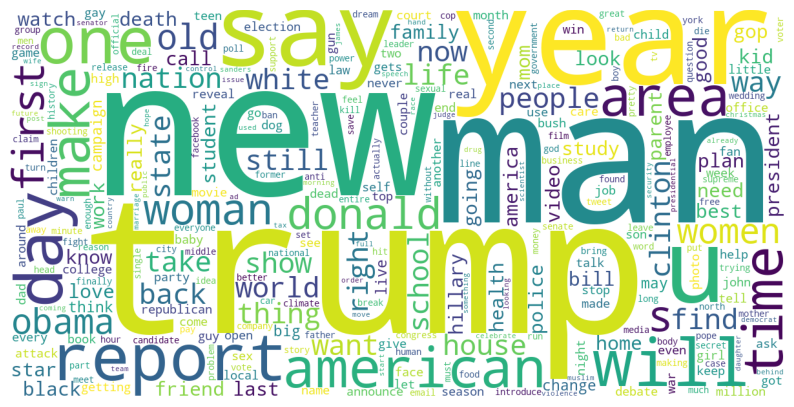

In [16]:
from wordcloud import WordCloud
text = " ".join(i for i in df.text)

wc = WordCloud(background_color = "white",
               width = 1200,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 300,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [10, 10])
plt.imshow(wc)
plt.axis("off")
plt.show

In [17]:
import pandas as pd
from termcolor import colored  # Assuming you're using termcolor for colored output
# Convert uppercase letters to lowercase letters in the "text" column
df["text"] = df["text"].apply(lambda sentence: " ".join(word.lower() for word in sentence.split()))

In [18]:
df

,text,label
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [19]:
# Delete punctuation marks from the "text" column
df["text"] = df["text"].str.replace('[^\w\s]', '')

In [20]:
df

,text,label
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [21]:
# Delete numbers from the "text" column
df["text"] = df["text"].str.replace('\d', '')

In [22]:
df

,text,label
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [23]:
from nltk.corpus import stopwords
# Delete stopwords from the "text" column
sw = stopwords.words("english")
df["text"] = df["text"].apply(lambda sentence: " ".join(word for word in sentence.split() if word not in sw))

In [24]:
from nltk.stem import WordNetLemmatizer
# Lemmatization
lemmatizer = WordNetLemmatizer()
df["text"] = df["text"].apply(lambda sentence: " ".join(lemmatizer.lemmatize(word) for word in sentence.split()))

In [25]:
# Display the first 10 rows with a background gradient
display(df.head(n=10).style.background_gradient(cmap="viridis"))

,text,label
0,former versace store clerk sue secret 'black code' minority shopper,0
1,"'roseanne' revival catch thorny political mood, better worse",0
2,mom starting fear son's web series closest thing grandchild,1
3,"boehner want wife listen, come alternative debt-reduction idea",1
4,j.k. rowling wish snape happy birthday magical way,0
5,advancing world's woman,0
6,fascinating case eating lab-grown meat,0
7,"ceo send kid school, work company",0
8,top snake handler leaf sinking huckabee campaign,1
9,friday's morning email: inside trump's presser age,0


In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd
x = df["text"]
y = df["label"]
# Split the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, shuffle=True, random_state=11)

In [27]:
print(train_x.shape, test_x.shape)

(21367,) (5342,)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Create and fit the TF-IDF word vectorizer on the training data
tf_idf_word_vectorizer = TfidfVectorizer(analyzer="word")
tf_idf_word_vectorizer.fit(train_x)

# Transform the training and testing sets using the fitted vectorizer
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

# Convert the TF-IDF matrices to dense arrays (if needed)
x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Sarcasm Classification using Logistic Regression:**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# Create a logistic regression model
log = LogisticRegression()

# Fit the model on the training data
log_model = log.fit(x_train_tf_idf_word, train_y)

# Evaluate the model using cross-validation on the test data
accuracy = cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=20).mean()

print("\nLogistic regression model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)


Logistic regression model with 'tf-idf' method
Accuracy ratio:  0.7371799709318576


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(test_y, log_model.predict(x_test_tf_idf_word.astype("float64"))))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2975
           1       0.80      0.68      0.74      2367

    accuracy                           0.78      5342
   macro avg       0.79      0.77      0.78      5342
weighted avg       0.79      0.78      0.78      5342



**Extreme Gradient Boosting:**

In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
# Create an XGBoost classifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb_model = xgb.fit(x_train_tf_idf_word, train_y)

# Evaluate the model using cross-validation on the test data
accuracy = cross_val_score(xgb_model, x_test_tf_idf_word, test_y, cv=20).mean()

print("\nXGBoost model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)


XGBoost model with 'tf-idf' method
Accuracy ratio:  0.6986192632343899


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(test_y, xgb_model.predict(x_test_tf_idf_word.astype("float64"))))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79      2975
           1       0.82      0.49      0.62      2367

    accuracy                           0.73      5342
   macro avg       0.76      0.70      0.70      5342
weighted avg       0.75      0.73      0.71      5342



In [33]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
# Create a LightGBM classifier
lgbm = LGBMClassifier()

# Fit the model on the training data
lgbm_model = lgbm.fit(x_train_tf_idf_word, train_y)

# Evaluate the model using cross-validation on the test data
accuracy = cross_val_score(lgbm_model, x_test_tf_idf_word, test_y, cv=20).mean()

print("\nLight GBM model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)

[LightGBM] [Info] Number of positive: 9357, number of negative: 12010
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.166120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32689
[LightGBM] [Info] Number of data points in the train set: 21367, number of used features: 1613
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437918 -> initscore=-0.249615
[LightGBM] [Info] Start training from score -0.249615
[LightGBM] [Info] Number of positive: 2248, number of negative: 2826
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 5074, number of used features: 266
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.443043 -> initscore=-0.228821
[L

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(test_y, lgbm_model.predict(x_test_tf_idf_word.astype("float64"))))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      2975
           1       0.80      0.54      0.65      2367

    accuracy                           0.74      5342
   macro avg       0.76      0.72      0.72      5342
weighted avg       0.75      0.74      0.73      5342



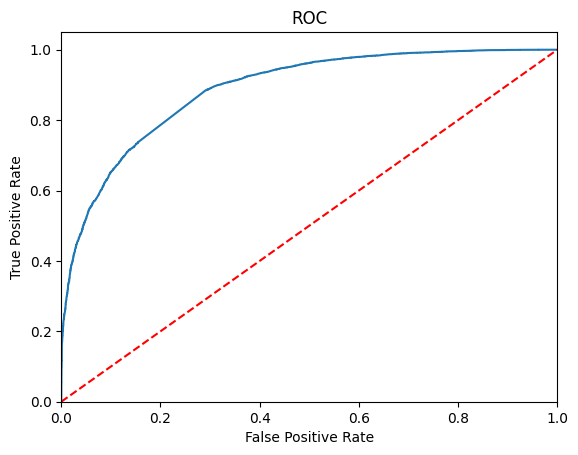

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y = train_y
X = x_train_tf_idf_word.astype("float64")

logit_roc_auc = roc_auc_score(y, lgbm_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, lgbm_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

**LSTM based Sarcasm Detection:**

In [36]:
from tqdm import tqdm
# Count unique words
unique_words = set(word for sent in tqdm(train_x) for word in sent)
# Find the maximum length of a sentence
len_max = max(len(sent) for sent in train_x)
print(len(unique_words))
print(len_max)

100%|████████████████████████████████████████████████████████████████████████| 21367/21367 [00:00<00:00, 118639.98it/s]

91
211


In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tqdm import tqdm
# Convert sequences back to text
train_texts = [" ".join(map(str, sequence)) for sequence in tqdm(train_x)]
test_texts = [" ".join(map(str, sequence)) for sequence in tqdm(test_x)]

# Create a tokenizer
tokenizer = Tokenizer(num_words=len(list(unique_words)))

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(train_texts)

# Convert text to sequences
train_x = tokenizer.texts_to_sequences(train_texts)
test_x = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to ensure consistent length
train_x = sequence.pad_sequences(train_x, maxlen=len_max)
test_x = sequence.pad_sequences(test_x, maxlen=len_max)

# Print the shapes of the transformed data
print(train_x.shape, test_x.shape)

100%|███████████████████████████████████████████████████████████████████████████| 5342/5342 [00:00<00:00, 75487.50it/s]


(21367, 211) (5342, 211)


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up EarlyStopping callback
early_stopping = EarlyStopping(
    min_delta=0.001,
    mode="auto",
    verbose=1,
    monitor="val_accuracy",  # Corrected metric name
    patience=3
)

# Create a list of callbacks
callbacks = [early_stopping]

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming len_max is the maximum length and len(list(unique_words)) is the vocabulary size

model = Sequential()
model.add(Embedding(len(list(unique_words)), 100, input_length=len_max))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model.add(Dense(25, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.0045),
    metrics=["accuracy"]
)

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 211, 100)          9100      
                                                                 
 lstm (LSTM)                 (None, 211, 64)           42240     
                                                                 
 dense (Dense)               (None, 211, 25)           1625      
                                                                 
 dropout (Dropout)           (None, 211, 25)           0         
                                                                 
 dense_1 (Dense)             (None, 211, 1)            26        
                                                                 
Total params: 52991 (207.00 KB)
Trainable params: 52991 (207.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_x,
    train_y,
    epochs=5,
    validation_data=(test_x, test_y),
    batch_size=16,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/5



1336/1336 [==============================] - 458s 336ms/step - loss: 0.6850 - accuracy: 0.5647 - val_loss: 0.6835 - val_accuracy: 0.5640
Epoch 2/5
1336/1336 [==============================] - 375s 281ms/step - loss: 0.6828 - accuracy: 0.5694 - val_loss: 0.6828 - val_accuracy: 0.5667
Epoch 3/5
1336/1336 [==============================] - 266s 199ms/step - loss: 0.6817 - accuracy: 0.5714 - val_loss: 0.6810 - val_accuracy: 0.5696
Epoch 4/5
1336/1336 [==============================] - 253s 190ms/step - loss: 0.6796 - accuracy: 0.5751 - val_loss: 0.6801 - val_accuracy: 0.5709
Epoch 5/5
1201/1336 [=========================>....] - ETA: 24s - loss: 0.6779 - accuracy: 0.5782

In [ ]:
import matplotlib.pyplot as plt

epoch_num = range(1, len(history.history["loss"]) + 1)
plt.plot(epoch_num, history.history["loss"], "r--")
plt.plot(epoch_num, history.history["val_loss"], "b-")
plt.legend(["Training loss", "Validation loss"])
plt.xlabel("Epoch numbers")
plt.ylabel("Loss")
plt.show()